In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
digits = datasets.load_digits()

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
def plotFigure(features):
    plt.figure(1, figsize=(3, 3))
    plt.imshow(features, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

0


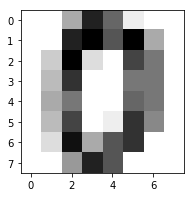

0
-----------------
1


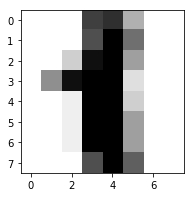

1
-----------------
2


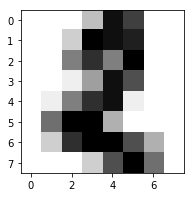

2
-----------------
3


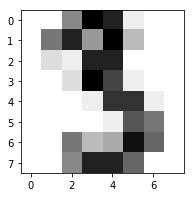

3
-----------------
4


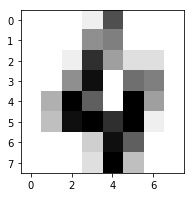

4
-----------------


In [5]:
for i in range(0, 5):
    features = digits.images[i]
    label = digits.target[i]
    
    print(i)
    plotFigure(features)
    print(label)
    print("-----------------")

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

# Min Max Normalization

In [7]:
min_limit = digits.images.min()
max_limit = digits.images.max()

digits.images = (digits.images - min_limit) / (max_limit - min_limit)

In [8]:
digits.images[0]

array([[0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ],
       [0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ],
       [0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ],
       [0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ],
       [0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ],
       [0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ]])

In [9]:
print(digits.images.min(), " to ", digits.images.max())

0.0  to  1.0


# Train test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#70%: train, 15%: val, 15% test

In [12]:
train_x, val_x, train_y, val_y = train_test_split(digits.images, digits.target, test_size=0.30, random_state=17)
val_x, test_x, val_y, test_y = train_test_split(val_x, val_y, test_size=0.50, random_state=17)

In [13]:
print("trainset size: ",train_x.shape[0])
print("validationset size: ",val_x.shape[0])
print("testset size: ",test_x.shape[0])

trainset size:  1257
validationset size:  270
testset size:  270


In [14]:
train_x = train_x.reshape(train_x.shape[0], 64)
val_x = val_x.reshape(val_x.shape[0], 64)
test_x = test_x.reshape(test_x.shape[0], 64)

# Model

In [15]:
import keras
from keras.models import Model
from keras.layers import Dense, Activation
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.models import Sequential
from keras import backend as K
from keras.callbacks import ModelCheckpoint,EarlyStopping

Using TensorFlow backend.


In [16]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(64,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam())

checkpointer = ModelCheckpoint(
    filepath='autoencode_digit.hdf5'
    , monitor = "val_loss"
    , verbose=1
    , save_best_only=True
    , mode = 'auto'
)

earlyStop = EarlyStopping(monitor='val_loss', patience=50)

In [18]:
#notice that input and outputs are same
score = model.fit(train_x, train_x, epochs=5000, validation_data=(val_x, val_x), callbacks=[checkpointer, earlyStop])

Train on 1257 samples, validate on 270 samples
Epoch 1/5000
1257/1257 [==============================] - 1s 603us/step - loss: 0.6637 - val_loss: 0.5730

Epoch 00001: val_loss improved from inf to 0.57296, saving model to autoencode_digit.hdf5
Epoch 2/5000
1257/1257 [==============================] - 0s 49us/step - loss: 0.4874 - val_loss: 0.4366

Epoch 00002: val_loss improved from 0.57296 to 0.43658, saving model to autoencode_digit.hdf5
Epoch 3/5000
1257/1257 [==============================] - 0s 56us/step - loss: 0.4278 - val_loss: 0.4205

Epoch 00003: val_loss improved from 0.43658 to 0.42048, saving model to autoencode_digit.hdf5
Epoch 4/5000
1257/1257 [==============================] - 0s 51us/step - loss: 0.4185 - val_loss: 0.4132

Epoch 00004: val_loss improved from 0.42048 to 0.41320, saving model to autoencode_digit.hdf5
Epoch 5/5000
1257/1257 [==============================] - 0s 49us/step - loss: 0.4104 - val_loss: 0.4045

Epoch 00005: val_loss improved from 0.41320 to 0.4


Epoch 00042: val_loss improved from 0.36312 to 0.36168, saving model to autoencode_digit.hdf5
Epoch 43/5000
1257/1257 [==============================] - 0s 48us/step - loss: 0.3566 - val_loss: 0.3610

Epoch 00043: val_loss improved from 0.36168 to 0.36096, saving model to autoencode_digit.hdf5
Epoch 44/5000
1257/1257 [==============================] - 0s 43us/step - loss: 0.3559 - val_loss: 0.3608

Epoch 00044: val_loss improved from 0.36096 to 0.36078, saving model to autoencode_digit.hdf5
Epoch 45/5000
1257/1257 [==============================] - 0s 44us/step - loss: 0.3556 - val_loss: 0.3599

Epoch 00045: val_loss improved from 0.36078 to 0.35990, saving model to autoencode_digit.hdf5
Epoch 46/5000
1257/1257 [==============================] - 0s 52us/step - loss: 0.3548 - val_loss: 0.3600

Epoch 00046: val_loss did not improve from 0.35990
Epoch 47/5000
1257/1257 [==============================] - 0s 45us/step - loss: 0.3546 - val_loss: 0.3593

Epoch 00047: val_loss improved from 0

1257/1257 [==============================] - 0s 50us/step - loss: 0.3416 - val_loss: 0.3471

Epoch 00086: val_loss improved from 0.34728 to 0.34706, saving model to autoencode_digit.hdf5
Epoch 87/5000
1257/1257 [==============================] - 0s 54us/step - loss: 0.3416 - val_loss: 0.3467

Epoch 00087: val_loss improved from 0.34706 to 0.34669, saving model to autoencode_digit.hdf5
Epoch 88/5000
1257/1257 [==============================] - 0s 50us/step - loss: 0.3412 - val_loss: 0.3471

Epoch 00088: val_loss did not improve from 0.34669
Epoch 89/5000
1257/1257 [==============================] - 0s 51us/step - loss: 0.3412 - val_loss: 0.3470

Epoch 00089: val_loss did not improve from 0.34669
Epoch 90/5000
1257/1257 [==============================] - 0s 48us/step - loss: 0.3411 - val_loss: 0.3461

Epoch 00090: val_loss improved from 0.34669 to 0.34606, saving model to autoencode_digit.hdf5
Epoch 91/5000
1257/1257 [==============================] - 0s 45us/step - loss: 0.3407 - val_lo

1257/1257 [==============================] - 0s 52us/step - loss: 0.3367 - val_loss: 0.3421

Epoch 00133: val_loss did not improve from 0.34138
Epoch 134/5000
1257/1257 [==============================] - 0s 55us/step - loss: 0.3361 - val_loss: 0.3414

Epoch 00134: val_loss did not improve from 0.34138
Epoch 135/5000
1257/1257 [==============================] - 0s 55us/step - loss: 0.3362 - val_loss: 0.3409

Epoch 00135: val_loss improved from 0.34138 to 0.34093, saving model to autoencode_digit.hdf5
Epoch 136/5000
1257/1257 [==============================] - 0s 45us/step - loss: 0.3362 - val_loss: 0.3411

Epoch 00136: val_loss did not improve from 0.34093
Epoch 137/5000
1257/1257 [==============================] - 0s 44us/step - loss: 0.3359 - val_loss: 0.3415

Epoch 00137: val_loss did not improve from 0.34093
Epoch 138/5000
1257/1257 [==============================] - 0s 45us/step - loss: 0.3358 - val_loss: 0.3408

Epoch 00138: val_loss improved from 0.34093 to 0.34083, saving model 

1257/1257 [==============================] - 0s 50us/step - loss: 0.3318 - val_loss: 0.3367

Epoch 00180: val_loss did not improve from 0.33618
Epoch 181/5000
1257/1257 [==============================] - 0s 48us/step - loss: 0.3322 - val_loss: 0.3368

Epoch 00181: val_loss did not improve from 0.33618
Epoch 182/5000
1257/1257 [==============================] - 0s 44us/step - loss: 0.3322 - val_loss: 0.3366

Epoch 00182: val_loss did not improve from 0.33618
Epoch 183/5000
1257/1257 [==============================] - 0s 46us/step - loss: 0.3324 - val_loss: 0.3362

Epoch 00183: val_loss did not improve from 0.33618
Epoch 184/5000
1257/1257 [==============================] - 0s 44us/step - loss: 0.3320 - val_loss: 0.3369

Epoch 00184: val_loss did not improve from 0.33618
Epoch 185/5000
1257/1257 [==============================] - 0s 44us/step - loss: 0.3324 - val_loss: 0.3361

Epoch 00185: val_loss improved from 0.33618 to 0.33615, saving model to autoencode_digit.hdf5
Epoch 186/5000
125

1257/1257 [==============================] - 0s 45us/step - loss: 0.3295 - val_loss: 0.3365

Epoch 00228: val_loss did not improve from 0.33368
Epoch 229/5000
1257/1257 [==============================] - 0s 48us/step - loss: 0.3298 - val_loss: 0.3344

Epoch 00229: val_loss did not improve from 0.33368
Epoch 230/5000
1257/1257 [==============================] - 0s 43us/step - loss: 0.3294 - val_loss: 0.3341

Epoch 00230: val_loss did not improve from 0.33368
Epoch 231/5000
1257/1257 [==============================] - 0s 51us/step - loss: 0.3290 - val_loss: 0.3340

Epoch 00231: val_loss did not improve from 0.33368
Epoch 232/5000
1257/1257 [==============================] - 0s 45us/step - loss: 0.3291 - val_loss: 0.3342

Epoch 00232: val_loss did not improve from 0.33368
Epoch 233/5000
1257/1257 [==============================] - 0s 45us/step - loss: 0.3289 - val_loss: 0.3337

Epoch 00233: val_loss improved from 0.33368 to 0.33366, saving model to autoencode_digit.hdf5
Epoch 234/5000
125

1257/1257 [==============================] - 0s 54us/step - loss: 0.3268 - val_loss: 0.3323

Epoch 00277: val_loss did not improve from 0.33181
Epoch 278/5000
1257/1257 [==============================] - 0s 54us/step - loss: 0.3268 - val_loss: 0.3320

Epoch 00278: val_loss did not improve from 0.33181
Epoch 279/5000
1257/1257 [==============================] - 0s 53us/step - loss: 0.3267 - val_loss: 0.3321

Epoch 00279: val_loss did not improve from 0.33181
Epoch 280/5000
1257/1257 [==============================] - 0s 57us/step - loss: 0.3267 - val_loss: 0.3322

Epoch 00280: val_loss did not improve from 0.33181
Epoch 281/5000
1257/1257 [==============================] - 0s 49us/step - loss: 0.3269 - val_loss: 0.3326

Epoch 00281: val_loss did not improve from 0.33181
Epoch 282/5000
1257/1257 [==============================] - 0s 49us/step - loss: 0.3267 - val_loss: 0.3330

Epoch 00282: val_loss did not improve from 0.33181
Epoch 283/5000
1257/1257 [==============================] - 0


Epoch 00327: val_loss did not improve from 0.33076
Epoch 328/5000
1257/1257 [==============================] - 0s 56us/step - loss: 0.3250 - val_loss: 0.3316

Epoch 00328: val_loss did not improve from 0.33076
Epoch 329/5000
1257/1257 [==============================] - 0s 53us/step - loss: 0.3249 - val_loss: 0.3309

Epoch 00329: val_loss did not improve from 0.33076
Epoch 330/5000
1257/1257 [==============================] - 0s 49us/step - loss: 0.3250 - val_loss: 0.3311

Epoch 00330: val_loss did not improve from 0.33076
Epoch 331/5000
1257/1257 [==============================] - 0s 46us/step - loss: 0.3249 - val_loss: 0.3322

Epoch 00331: val_loss did not improve from 0.33076
Epoch 332/5000
1257/1257 [==============================] - 0s 45us/step - loss: 0.3253 - val_loss: 0.3312

Epoch 00332: val_loss did not improve from 0.33076
Epoch 333/5000
1257/1257 [==============================] - 0s 44us/step - loss: 0.3253 - val_loss: 0.3311

Epoch 00333: val_loss did not improve from 0.

1257/1257 [==============================] - 0s 53us/step - loss: 0.3234 - val_loss: 0.3308

Epoch 00377: val_loss did not improve from 0.33001
Epoch 378/5000
1257/1257 [==============================] - 0s 53us/step - loss: 0.3235 - val_loss: 0.3317

Epoch 00378: val_loss did not improve from 0.33001
Epoch 379/5000
1257/1257 [==============================] - 0s 44us/step - loss: 0.3237 - val_loss: 0.3315

Epoch 00379: val_loss did not improve from 0.33001
Epoch 380/5000
1257/1257 [==============================] - 0s 50us/step - loss: 0.3235 - val_loss: 0.3314

Epoch 00380: val_loss did not improve from 0.33001
Epoch 381/5000
1257/1257 [==============================] - 0s 50us/step - loss: 0.3234 - val_loss: 0.3311

Epoch 00381: val_loss did not improve from 0.33001
Epoch 382/5000
1257/1257 [==============================] - 0s 46us/step - loss: 0.3235 - val_loss: 0.3302

Epoch 00382: val_loss did not improve from 0.33001
Epoch 383/5000
1257/1257 [==============================] - 0

1257/1257 [==============================] - 0s 64us/step - loss: 0.3208 - val_loss: 0.3290

Epoch 00426: val_loss did not improve from 0.32813
Epoch 427/5000
1257/1257 [==============================] - 0s 57us/step - loss: 0.3209 - val_loss: 0.3286

Epoch 00427: val_loss did not improve from 0.32813
Epoch 428/5000
1257/1257 [==============================] - 0s 61us/step - loss: 0.3202 - val_loss: 0.3285

Epoch 00428: val_loss did not improve from 0.32813
Epoch 429/5000
1257/1257 [==============================] - 0s 62us/step - loss: 0.3203 - val_loss: 0.3292

Epoch 00429: val_loss did not improve from 0.32813
Epoch 430/5000
1257/1257 [==============================] - 0s 62us/step - loss: 0.3202 - val_loss: 0.3280

Epoch 00430: val_loss improved from 0.32813 to 0.32797, saving model to autoencode_digit.hdf5
Epoch 431/5000
1257/1257 [==============================] - 0s 57us/step - loss: 0.3204 - val_loss: 0.3285

Epoch 00431: val_loss did not improve from 0.32797
Epoch 432/5000
125

1257/1257 [==============================] - 0s 46us/step - loss: 0.3186 - val_loss: 0.3276

Epoch 00476: val_loss did not improve from 0.32628
Epoch 477/5000
1257/1257 [==============================] - 0s 53us/step - loss: 0.3180 - val_loss: 0.3272

Epoch 00477: val_loss did not improve from 0.32628
Epoch 478/5000
1257/1257 [==============================] - 0s 46us/step - loss: 0.3179 - val_loss: 0.3277

Epoch 00478: val_loss did not improve from 0.32628
Epoch 479/5000
1257/1257 [==============================] - 0s 45us/step - loss: 0.3183 - val_loss: 0.3275

Epoch 00479: val_loss did not improve from 0.32628
Epoch 480/5000
1257/1257 [==============================] - 0s 44us/step - loss: 0.3183 - val_loss: 0.3269

Epoch 00480: val_loss did not improve from 0.32628
Epoch 481/5000
1257/1257 [==============================] - 0s 48us/step - loss: 0.3178 - val_loss: 0.3272

Epoch 00481: val_loss did not improve from 0.32628
Epoch 482/5000
1257/1257 [==============================] - 0

1257/1257 [==============================] - 0s 45us/step - loss: 0.3164 - val_loss: 0.3263

Epoch 00525: val_loss did not improve from 0.32524
Epoch 526/5000
1257/1257 [==============================] - 0s 49us/step - loss: 0.3167 - val_loss: 0.3257

Epoch 00526: val_loss did not improve from 0.32524
Epoch 527/5000
1257/1257 [==============================] - 0s 46us/step - loss: 0.3164 - val_loss: 0.3255

Epoch 00527: val_loss did not improve from 0.32524
Epoch 528/5000
1257/1257 [==============================] - 0s 45us/step - loss: 0.3164 - val_loss: 0.3265

Epoch 00528: val_loss did not improve from 0.32524
Epoch 529/5000
1257/1257 [==============================] - 0s 48us/step - loss: 0.3165 - val_loss: 0.3252

Epoch 00529: val_loss improved from 0.32524 to 0.32519, saving model to autoencode_digit.hdf5
Epoch 530/5000
1257/1257 [==============================] - 0s 44us/step - loss: 0.3169 - val_loss: 0.3255

Epoch 00530: val_loss did not improve from 0.32519
Epoch 531/5000
125

1257/1257 [==============================] - 0s 83us/step - loss: 0.3147 - val_loss: 0.3252

Epoch 00575: val_loss did not improve from 0.32359
Epoch 576/5000
1257/1257 [==============================] - 0s 106us/step - loss: 0.3145 - val_loss: 0.3249

Epoch 00576: val_loss did not improve from 0.32359
Epoch 577/5000
1257/1257 [==============================] - 0s 120us/step - loss: 0.3150 - val_loss: 0.3238

Epoch 00577: val_loss did not improve from 0.32359
Epoch 578/5000
1257/1257 [==============================] - 0s 113us/step - loss: 0.3151 - val_loss: 0.3267

Epoch 00578: val_loss did not improve from 0.32359
Epoch 579/5000
1257/1257 [==============================] - 0s 95us/step - loss: 0.3157 - val_loss: 0.3245

Epoch 00579: val_loss did not improve from 0.32359
Epoch 580/5000
1257/1257 [==============================] - 0s 84us/step - loss: 0.3153 - val_loss: 0.3237

Epoch 00580: val_loss did not improve from 0.32359
Epoch 581/5000
1257/1257 [==============================] 

1257/1257 [==============================] - 0s 61us/step - loss: 0.3129 - val_loss: 0.3237

Epoch 00626: val_loss did not improve from 0.32291
Epoch 627/5000
1257/1257 [==============================] - 0s 56us/step - loss: 0.3131 - val_loss: 0.3248

Epoch 00627: val_loss did not improve from 0.32291
Epoch 628/5000
1257/1257 [==============================] - 0s 57us/step - loss: 0.3133 - val_loss: 0.3242

Epoch 00628: val_loss did not improve from 0.32291
Epoch 629/5000
1257/1257 [==============================] - 0s 79us/step - loss: 0.3131 - val_loss: 0.3237

Epoch 00629: val_loss did not improve from 0.32291
Epoch 630/5000
1257/1257 [==============================] - 0s 65us/step - loss: 0.3128 - val_loss: 0.3237

Epoch 00630: val_loss did not improve from 0.32291
Epoch 631/5000
1257/1257 [==============================] - 0s 78us/step - loss: 0.3132 - val_loss: 0.3253

Epoch 00631: val_loss did not improve from 0.32291
Epoch 632/5000
1257/1257 [==============================] - 0

# Restore the best weights

In [19]:
from keras.models import load_model
model = load_model("autoencode_digit.hdf5")
model.save_weights('autoencode_digit.h5')

# Monitor train and validation loss

In [20]:
best_iteration = np.argmin(score.history['val_loss'])+1

val_scores = score.history['val_loss'][0:best_iteration]
train_scores = score.history['loss'][0:best_iteration]

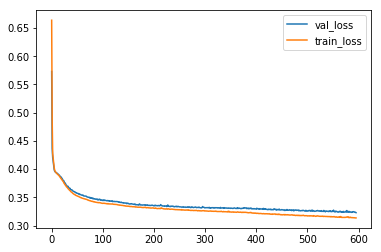

In [21]:
plt.plot(val_scores, label='val_loss')
plt.plot(train_scores, label='train_loss')
plt.legend(loc='upper right')
plt.show()

# Performance

We expect that validation and test set scores should be close

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [23]:
def calculatePerformance(x):
    predictions = model.predict(x)
    actuals = x.copy()
    
    return mean_absolute_error(actuals, predictions), sqrt(mean_squared_error(actuals, predictions))

In [24]:
val_perf = calculatePerformance(val_x)
test_perf = calculatePerformance(test_x)

In [25]:
test_perf[0]

0.1146375678415188

In [26]:
val_perf[0]

0.11345667229361296

In [27]:
#mae check
abs(val_perf[0] - test_perf[0]) < 0.01

True

In [28]:
#rmse check
abs(val_perf[1] - test_perf[1]) < 0.01

True

# Autoencode and autodecode

In [29]:
def autoEncodeDecode(x, model):
    decoded_imgs = model.predict(x)
    summary_layer_idx = int(len(model.layers) / 2) - 1
    get_layer_output = K.function([model.layers[0].input], [model.layers[summary_layer_idx].output])
    compressed = get_layer_output([x])[0]
    
    x = x.reshape(x.shape[0], 8, 8)
    decoded_imgs = decoded_imgs.reshape(decoded_imgs.shape[0], 8, 8)
    compressed = compressed.reshape(compressed.shape[0], 1, 2)
    
    return x, decoded_imgs, compressed

In [30]:
autoencodings = autoEncodeDecode(test_x, model)

In [31]:
original_imgs = autoencodings[0]
reconstructed_imgs = autoencodings[1]
compressed = autoencodings[2]

original image:


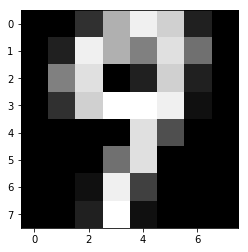

autoencoding:  [42.43143  11.366243] 

reconstructed image:


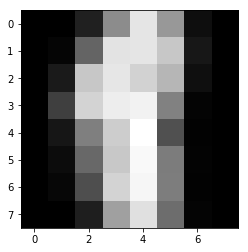

-----------------


In [32]:
for i in range(0, 1):
    
    print("original image:")
    plt.imshow(original_imgs[i])
    plt.gray()
    plt.show()
    
    print("autoencoding: ", compressed[i, 0],"\n")
    
    print("reconstructed image:")
    plt.imshow(reconstructed_imgs[i])
    plt.gray()
    plt.show()
    
    print("-----------------")

In [33]:
compressed = compressed.reshape(compressed.shape[0], 2)

In [34]:
compressed[0:5]

array([[42.43143  , 11.366243 ],
       [29.368538 ,  4.6883845],
       [33.664993 ,  3.5971076],
       [21.441372 ,  3.1556783],
       [59.590984 , 21.33383  ]], dtype=float32)

In [35]:
test_y[0:5]

array([9, 2, 2, 8, 4])

In [36]:
pivot = pd.DataFrame(compressed, columns = ["x1", "x2"])
pivot["label"] = test_y

In [37]:
pivot.head()

,x1,x2,label
0,42.431431,11.366243,9
1,29.368538,4.688385,2
2,33.664993,3.597108,2
3,21.441372,3.155678,8
4,59.590984,21.333830,4


In [38]:
colors = ["red", "green", "blue", "orange", "black", "purple", "yellow", "grey", "pink", "brown"]

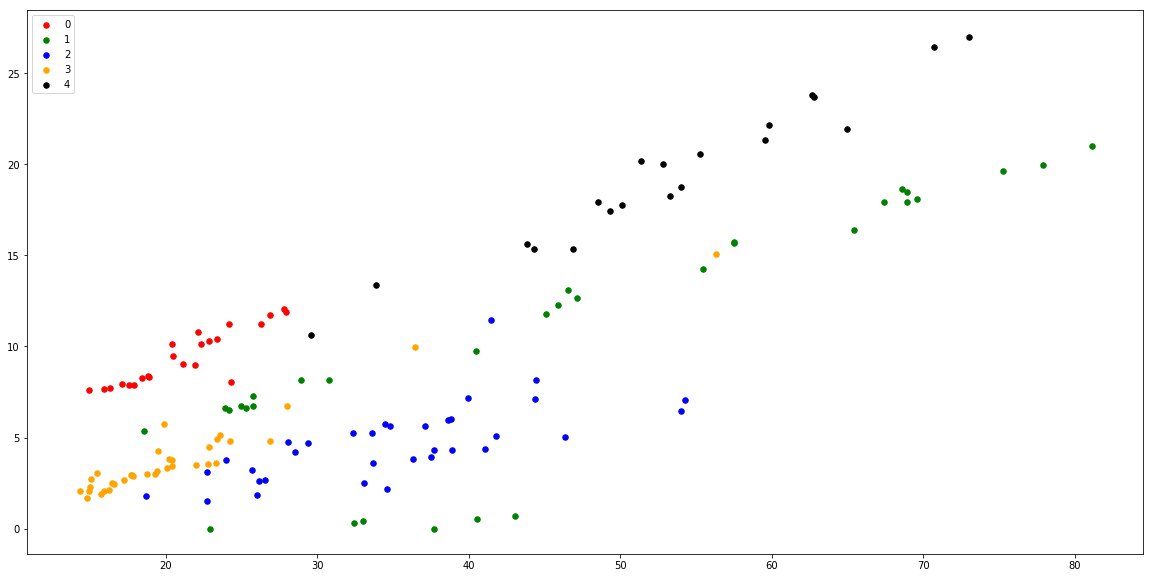

In [39]:
fig, ax = plt.subplots(figsize=(20, 10))

for i in range(0, 5):
    tmp = pivot[pivot.label == i]
    ax.scatter(tmp.x1, tmp.x2, s = 30, c = colors[i], label = str(i))

ax.legend(loc="upper left")
#ax.set(xlim=(-0.1, 10), ylim=(-0.1, 10))